In [219]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed()

In [220]:
# Generate the datatset containing the randon walk sequence in one hot vector endoded

def generate_random_walk_dataset(training_set_size, sequence_size):
    new_position = 2
    dataset = []
    for i in range(training_set_size):
        sequences = []
        for j in range(sequence_size):
            sequence = []
            new_position = 2
            
            while -1 < new_position < 5:
                sub_sequence = [ 0 for k in range(5)]
                sub_sequence[new_position] = 1
                sequence += [sub_sequence]
                new_position = random.choice([new_position-1 , new_position+1])
            sequences += [sequence]
        dataset += [sequences]
    return dataset

In [221]:
dataset =  generate_random_walk_dataset(100, 10)

In [222]:
# First experiment Figure 3

def first_experiment(dataset, lambdas, true_weights):
    errors = []
    learning_rate = 0.01
    epsilon = 0.001
    for lbda in lambdas:
        errors_accumulated = 0
        for training_set in dataset:
            weights = np.array([0.5 for i in range(5)])
            old_weights = np.array([0.0 for i in range(5)])

            while (not(all([ abs(wgt)<epsilon for wgt in old_weights - weights ]))):
                delta_weight_after_training_set = np.array([0.0 for i in range(5)])
                old_weights = weights.copy()

                for sequences in training_set:
                    error = np.array([0.0 for i in range(5)])
                    sequences = np.array(sequences)
                    
                    delta_weight = np.array([0.0 for i in range(5)])
                    label = 1 if sequences[-1][-1] == 1 else 0
                    for sequence_number in range(sequences.shape[0]):
                        sequence = sequences[sequence_number]
                        error = lbda * error + sequence
                        output = sequence.dot(weights)

                        if sequence_number == sequences.shape[0]-1 :
                            delta_weight += learning_rate * (label - output) * error
                        else:
                            next_output = sequences[sequence_number+1].dot(weights)
                            delta_weight += learning_rate * (next_output - output) * error
                    
                    delta_weight_after_training_set += delta_weight
                
                weights += delta_weight_after_training_set
            errors_accumulated += np.sqrt(np.mean((weights-true_weights)**2))
                
        errors += [errors_accumulated]
    return errors

In [223]:
true_weights = [.166, 0.33, 0.5, 0.66, 0.833]
lambdas = [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
a = np.array(first_experiment(dataset, lambdas, true_weights))/100

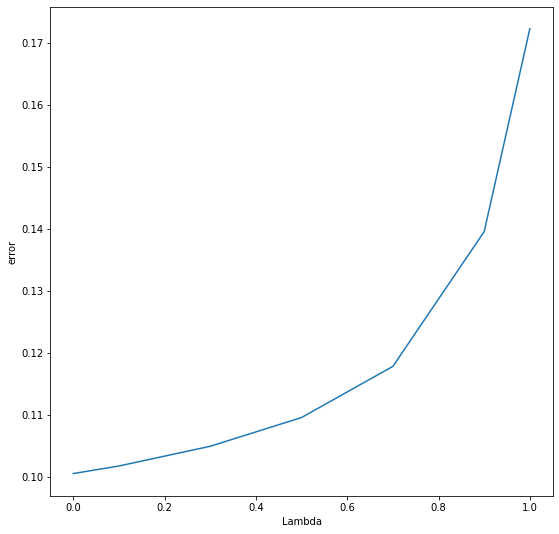

In [224]:
plt.figure(figsize=(9, 9))
plt.xlabel('Lambda')
plt.ylabel('error')
plt.plot(lambdas, a)

In [225]:
# Second experiment Figure 4
def second_experiment(dataset, lambdas,true_weights):
    errors = []
    epsilon = 0.001
    for lbda in lambdas:
        learning_rate_list = []
        learning_rate_errors = []
        lambda_errors = []
        for learning_rate in np.arange(0.0, 0.65, 0.05):
            errors_accumulated=0
            for training_set in dataset:
                weights = np.array([0.5 for i in range(5)])            
                old_weights = weights.copy()

                for sequences in training_set:
                    error = np.array([0.0 for i in range(5)])
                    sequences = np.array(sequences)
                    delta_weight = np.array([0.0 for i in range(5)])
                    label = 1 if sequences[-1][-1] == 1 else 0
                    for sequence_number in range(sequences.shape[0]):
                        sequence = sequences[sequence_number]
                        error = lbda * error + sequence
                        output = sequence.dot(weights)

                        if sequence_number == sequences.shape[0]-1 :
                            delta_weight += learning_rate * (label - output) * error
                        else:
                            delta_weight += learning_rate * ((sequences[sequence_number+1].dot(weights)) - (output)) * error
                            
                    weights += delta_weight
                    errors_accumulated += np.sqrt(np.mean((weights-true_weights)**2))
                
            learning_rate_list += [learning_rate]
            learning_rate_errors += [errors_accumulated]
        lambda_errors += [learning_rate_errors]
        errors += [learning_rate_errors]
    return errors, learning_rate_list

In [226]:
a, learning_rate_list = second_experiment(dataset, [0, 0.3, 0.8, 1], true_weights)
a = np.array(a)/100

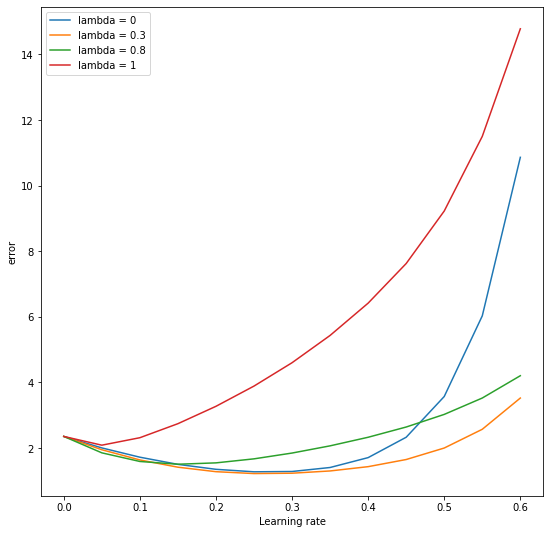

In [227]:
plt.figure(figsize=(9, 9))

plt.plot(learning_rate_list, a[0], label = "lambda = 0")
plt.plot(learning_rate_list, a[1], label = "lambda = 0.3")
plt.plot(learning_rate_list, a[2], label = "lambda = 0.8")
plt.plot(learning_rate_list, a[3], label = "lambda = 1")
plt.xlabel('Learning rate')
plt.ylabel('error')
plt.legend()
plt.show()

In [228]:
# Second experiment Figure 5
lambdas =[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
a, learning_rate_list = second_experiment(dataset, lambdas, true_weights)
a = np.array(a)/100
fig5 = [min(i) for i in a]

No handles with labels found to put in legend.


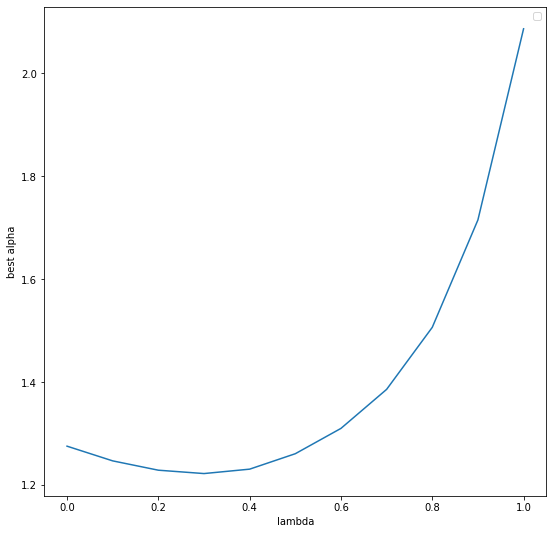

In [230]:
plt.figure(figsize=(9, 9))
plt.xlabel('lambda')
plt.ylabel('best alpha')
plt.legend()
plt.plot(lambdas, fig5, label = "")